Naive Bayes Classification

fast, simple, suitable for high dimensional datasets

fast, tuneable -> quick dirty baseline

Based on bayes theorem

finding the prob of a label given some observed features

P(L|features) = P(features|L) P(L) / P(features)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

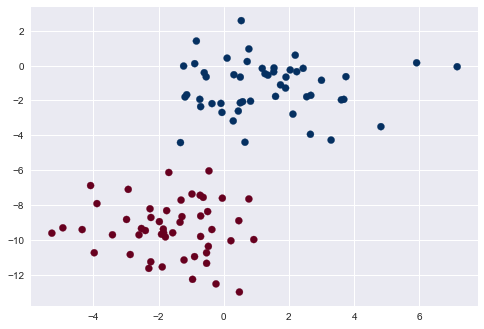

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100,2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap='RdBu');

In [5]:
X.shape

(100, 2)

In [6]:
y.shape

(100,)

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None)

In [53]:
rng = np.random.RandomState(0)
[1,1] * rng.rand(1,2) + [1,1]

array([[ 1.5488135 ,  1.71518937]])

In [69]:
# create a random data within axis boundary
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000,2)
ynew = model.predict(Xnew)
ynew[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

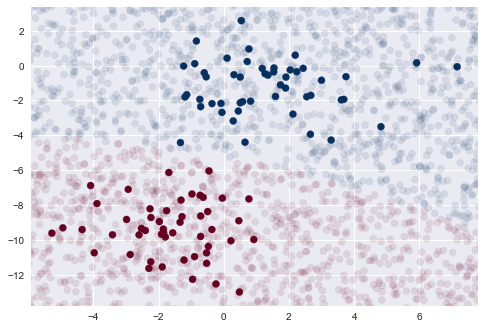

In [86]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew[:], s=50, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [87]:
X[:10]

array([[  0.92141506,  -9.98499137],
       [ -5.26927614,  -9.6186543 ],
       [ -0.45292089,  -6.04316334],
       [ -0.0856312 ,  -2.16867404],
       [  1.53194956,  -0.36022153],
       [ -0.72443515,  -7.44202457],
       [ -0.52577983, -11.34940749],
       [ -1.23044866,  -0.02408431],
       [ -2.25997736,  -8.21779094],
       [  0.77075118,  -7.65464691]])

In [60]:
lim

(-5.8992664866054731,
 7.7862788381523007,
 -13.788951516177548,
 3.3764615206977902)

In [73]:
# Multinomial Naive Bayes

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [74]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [78]:
train.data[0]

"From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\nSubject: Re: Losing your temper is not a Christian trait\nOrganization: Motorola LPA Development\nLines: 26\n\nIn article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com\n(jcj) wrote:\n\n> I'd like to remind people of the withering of the fig tree and Jesus\n> driving the money changers et. al. out of the temple.  I think those\n> were two instances of Christ showing anger (as part of His human side).\n> \nYes, and what about Paul saying:\n\n26 Be ye angry, and sin not: let not the sun go down upon your wrath:\n(Ephesians 4:26).\n\nObviously then, we can be angry w/o sinning.\n\nJon\n\n------------------------------------------------\nJon Ogden         - jono@mac-ak-24.rtsg.mot.com\nMotorola Cellular - Advanced Products Division\nVoice: 708-632-2521      Data: 708-632-6086\n------------------------------------------------\n\nThey drew a circle and shut him out.\nHeretic, Rebel, a thing to flout.\nBut Love and I had the wit

In [79]:
test.data[0]

'From: livesey@solntze.wpd.sgi.com (Jon Livesey)\nSubject: Re: After 2000 years, can we say that Christian Morality is\nOrganization: sgi\nLines: 51\nDistribution: world\nNNTP-Posting-Host: solntze.wpd.sgi.com\n\nIn article <1r3570$hkv@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n|> In article <1r2ls3$8mo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n|> #|> \n|> #|> #This is quite different from saying "Employing force on other people\n|> #|> #is immoral, period.   Unfortunately, from time to time we are obliged\n|> #|> #to do this immoral thing for reasons of self-preservation, and so\n|> #|> #we have to bear the moral consequences of that.\n|> #|> \n|> #|> Since both statements, to all intents and purposes, say effectively\n|> #|> the same thing, \n|> #\n|> #Are you serious?  Two statements, one of which says that use of force\n|> #in the given situation is moral, and the other of which says it is\n|> #not moral "say effectively the same

In [88]:
train.target

array([2, 2, 1, ..., 2, 3, 1], dtype=int64)

In [89]:
train.target.shape

(2153,)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [91]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [92]:
labels

array([2, 0, 1, ..., 1, 2, 1], dtype=int64)

In [93]:
labels.shape

(1432,)

In [98]:
test.target

array([3, 0, 1, ..., 1, 2, 0], dtype=int64)

In [100]:
test.target.shape

(1432,)

In [113]:
labels[labels == 0].sum()

0

In [130]:
(labels == 0).sum()

355

In [131]:
(labels == 1).sum()

394

In [132]:
(labels == 2).sum()

635

In [133]:
(labels == 3).sum()

48

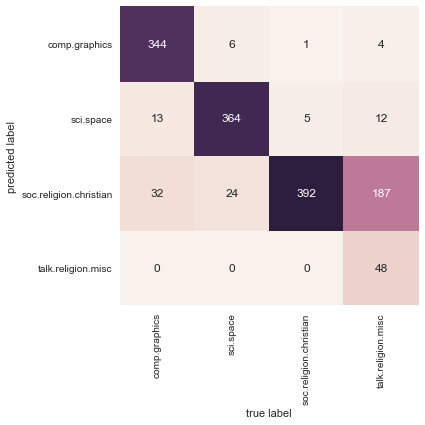

In [134]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');